## Assignment  no: 2
## Your name: Huda Aisyah Khoirunissa          student ID: 1144833
### When you use code, either from another student or an outside source, you should cite it. Tell me where the code comes from.
#### (v)  1. I Totally write by myself (都自己寫)
#### ( ) 2. Refer to other students (參考同學,註明姓名學號):   name and student id
#### ( ) 3. Refer to outside sources (參考外部資料網站), where:
## If you choose 2 or 3, tell me how similar you are. (如果選2,3, 請勾選相似程度)
#### ( ) < 25% ( ) 25%..50% ( ) 50%..75% ( v ) > 75%
### Give me your expected score (給我你的期望分數): 85
### Reasons (理由): I met and exceeded the core requirements used seven learning rate schedular PyTorch LR schedulers and called scheduler.step() after optimizer updates. I produced clear LR–epoch plots and fixed my early mistake of attaching multiple schedulers to one optimizer by running them separately with a consistent base LR. The curves show the expected behaviors for Step, Exponential, MultiStep, CosineAnnealing, ReduceLROnPlateau, Constant, and, Polynomial. Some minor polish (tighter captions/labels, color choices) remains, but the work demonstrates solid understanding and improvement; I believe ~85 is reasonable.


## If you use AI, you must clearly state what AI was used for and how it was used in your submission. Answer the following questions: (若有使用AI, 需說明AI使用的內容與方式, 回答底下問題)
- The tool you used (使用的AI工具名稱): ChatGPT 5
- How you used it (lookup / debugging / code snippet) (使用的方式): Debugging and clarification. I asked why my LR plots failed to show correctly (overlapping/blank curves). I was combining multiple schedulers on one optimizer and I forgot to provide a metric for ReduceLROnPlateau. I requested simple fixes and sanity checks based on the PyTorch docs.
- How you modified and understood the result (修改與理解過程): I applied the same guidance: ran each scheduler in isolation (separate runs/optimizers), kept a consistent base LR, recorded the LR each epoch for plotting, and added the missing metric for ReduceLROnPlateau. After these changes, the curves matched the expected shapes, confirming my understanding of why the earlier visualization failed and how to correct it.

## 說明與心得 explain your code briefly, tell me something, and share your experience.

In my code, I built a set of simple linear models and gave each one its own optimizer. To explore different strategies, I attached seven learning-rate schedulers: StepLR, ExponentialLR, MultiStepLR, CosineAnnealingLR, ReduceLROnPlateau, ConstantLR, and PolynomialLR. I trained them over 100 epochs with a batch size of 16 (small enough for my computer’s memory). At each epoch, the optimizers performed parameter updates, I logged the current learning rate, and then the schedulers updated it for the next round. Finally, I plotted all of the LR curves to visualize how they behave.

The main goal was to compare the different patterns. StepLR drops the LR in discrete steps, ExponentialLR decays smoothly, MultiStepLR makes sharp drops at milestone epochs, CosineAnnealingLR follows a cosine wave down to near zero, ReduceLROnPlateau slashes the LR when the metric plateaus, ConstantLR holds steady before shifting, and PolynomialLR decays steadily following a power law.

At first, my plots looked wrong because I accidentally combined multiple schedulers on a single optimizer and forgot to pass a metric into ReduceLROnPlateau. After fixing those mistakes—running each scheduler on its own optimizer, using a consistent base LR, and providing the metric properly—the curves finally matched the expected shapes. Going through the PyTorch docs and experimenting directly was really helpful, and I came away with a clearer sense of when each scheduler is most useful.


####

In [ ]:
import torch
import matplotlib.pyplot as plt

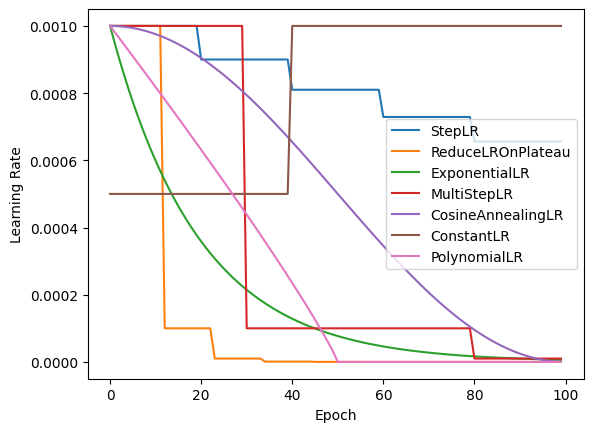

In [ ]:
import torch, matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau, ExponentialLR, MultiStepLR, CosineAnnealingLR, ConstantLR, PolynomialLR

model1 = torch.nn.Sequential(torch.nn.Linear(1, 1))
model2 = torch.nn.Sequential(torch.nn.Linear(1, 1))
model3 = torch.nn.Sequential(torch.nn.Linear(1, 1))
model4 = torch.nn.Sequential(torch.nn.Linear(1, 1))
model5 = torch.nn.Sequential(torch.nn.Linear(1, 1))
model6 = torch.nn.Sequential(torch.nn.Linear(1, 1))
model7 = torch.nn.Sequential(torch.nn.Linear(1, 1))

optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.001, momentum=0.9)
optimizer3 = torch.optim.SGD(model3.parameters(), lr=0.001, momentum=0.9)
optimizer4 = torch.optim.SGD(model4.parameters(), lr=0.001, momentum=0.9)
optimizer5 = torch.optim.SGD(model5.parameters(), lr=0.001, momentum=0.9)
optimizer6 = torch.optim.SGD(model6.parameters(), lr=0.001, momentum=0.9)
optimizer7 = torch.optim.SGD(model7.parameters(), lr=0.001, momentum=0.9)

lrscheduler1 = StepLR(optimizer1, step_size=20, gamma=0.9)
lrscheduler2 = ReduceLROnPlateau(optimizer2, mode='min', factor=0.1, patience=10)
lrscheduler3 = ExponentialLR(optimizer3, gamma=0.95)
lrscheduler4 = MultiStepLR(optimizer4, milestones=[30, 80], gamma=0.1)
lrscheduler5 = CosineAnnealingLR(optimizer5, T_max=100, eta_min=0.0)
lrscheduler6 = ConstantLR(optimizer6, factor=0.5, total_iters=40)
lrscheduler7 = PolynomialLR(optimizer7, total_iters=50, power=0.9)

lr1, lr2, lr3, lr4, lr5, lr6, lr7 = [], [], [], [], [], [], []
for epoch in range(100):
    for batch_size in range(16):
        optimizer1.step(); optimizer2.step(); optimizer3.step(); optimizer4.step();
        optimizer5.step(); optimizer6.step(); optimizer7.step()

    lr1.append(lrscheduler1.get_last_lr()[0])
    lr2.append(optimizer2.param_groups[0]['lr'])
    lr3.append(lrscheduler3.get_last_lr()[0])
    lr4.append(lrscheduler4.get_last_lr()[0])
    lr5.append(lrscheduler5.get_last_lr()[0])
    lr6.append(lrscheduler6.get_last_lr()[0])
    lr7.append(lrscheduler7.get_last_lr()[0])

    lrscheduler1.step()
    lrscheduler2.step(0.5)
    lrscheduler3.step()
    lrscheduler4.step()
    lrscheduler5.step()
    lrscheduler6.step()
    lrscheduler7.step()

plt.plot(lr1, label='StepLR')
plt.plot(lr2, label='ReduceLROnPlateau')
plt.plot(lr3, label='ExponentialLR')
plt.plot(lr4, label='MultiStepLR')
plt.plot(lr5, label='CosineAnnealingLR')
plt.plot(lr6, label='ConstantLR')
plt.plot(lr7, label='PolynomialLR')
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.legend()
plt.show()